In [1]:
import math
#from sage.plot.point import Point

In [2]:
def Log2(x): 
    if x == 0: 
        return false 
    return (math.log10(x) / math.log10(2))

def Collatz(n):
    if math.ceil(Log2(n)) == math.floor(Log2(n)):
        return int(Log2(n))
    if n % 2 == 0:
        return Collatz(n/2)
    else:
        return Collatz(3*n+1)

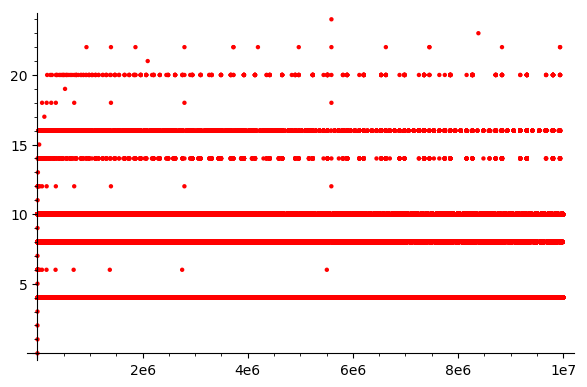

In [26]:
Num = 10000000
points = [(n,Collatz(n)) for n in range(1,Num)]
list_plot(points,color='red', pointsize=10)

In [25]:
for x in range(2,109):
    print "2 ^",x,"- 1 :",factor(2^x-1)

2 ^ 2 - 1 : 3
2 ^ 3 - 1 : 7
2 ^ 4 - 1 : 3 * 5
2 ^ 5 - 1 : 31
2 ^ 6 - 1 : 3^2 * 7
2 ^ 7 - 1 : 127
2 ^ 8 - 1 : 3 * 5 * 17
2 ^ 9 - 1 : 7 * 73
2 ^ 10 - 1 : 3 * 11 * 31
2 ^ 11 - 1 : 23 * 89
2 ^ 12 - 1 : 3^2 * 5 * 7 * 13
2 ^ 13 - 1 : 8191
2 ^ 14 - 1 : 3 * 43 * 127
2 ^ 15 - 1 : 7 * 31 * 151
2 ^ 16 - 1 : 3 * 5 * 17 * 257
2 ^ 17 - 1 : 131071
2 ^ 18 - 1 : 3^3 * 7 * 19 * 73
2 ^ 19 - 1 : 524287
2 ^ 20 - 1 : 3 * 5^2 * 11 * 31 * 41
2 ^ 21 - 1 : 7^2 * 127 * 337
2 ^ 22 - 1 : 3 * 23 * 89 * 683
2 ^ 23 - 1 : 47 * 178481
2 ^ 24 - 1 : 3^2 * 5 * 7 * 13 * 17 * 241
2 ^ 25 - 1 : 31 * 601 * 1801
2 ^ 26 - 1 : 3 * 2731 * 8191
2 ^ 27 - 1 : 7 * 73 * 262657
2 ^ 28 - 1 : 3 * 5 * 29 * 43 * 113 * 127
2 ^ 29 - 1 : 233 * 1103 * 2089
2 ^ 30 - 1 : 3^2 * 7 * 11 * 31 * 151 * 331
2 ^ 31 - 1 : 2147483647
2 ^ 32 - 1 : 3 * 5 * 17 * 257 * 65537
2 ^ 33 - 1 : 7 * 23 * 89 * 599479
2 ^ 34 - 1 : 3 * 43691 * 131071
2 ^ 35 - 1 : 31 * 71 * 127 * 122921
2 ^ 36 - 1 : 3^3 * 5 * 7 * 13 * 19 * 37 * 73 * 109
2 ^ 37 - 1 : 223 * 616318177
2 ^ 38